# Solving facility problem using NSGA-II

Minimize $f_1(x_1, x_2) = \sqrt{(x_1 - 2)^2 + (x_2 - 1)^2}$ : distance between the company facilities 

Maximize $f_2(x_1, x_2) = -\sqrt{(x_1 - 3)^2 + (x_2 - 4)^2)}$ : distance between the new facility and a competitor's facility

s.t. 

$g_1(x_1, x_2) = x_1 + 2 * x_2 - 6 <= 0$  : zoning regulations

$g_2(x_1, x_2) = 2 * x_1 - x_2 - 2 <= 0$  : Environmental constraints or property boundaries

$0 \le x_1, x_2 \le 5$  : Boundary constraints

In [1]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
import math
import matplotlib.pyplot as plt

class FacilityProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([0,0]),
                         xu=np.array([5,5]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = math.sqrt((x[0]-2)**2 + (x[1]-1)**2)
        f2 = -math.sqrt((x[0]-3)**2 + (x[1]-4)**2) # convert to minimization problem

        g1 = x[0]+2*x[1]-6 # Zooning constraint
        g2 = 2*x[0]-x[1]-2 # Environment/property constraint

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]

problem = FacilityProblem()

In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import FloatRandomSampling

algorithm = NSGA2(
    pop_size=50,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.8),
    mutation = PolynomialMutation(prob=0.6, repair=RoundingRepair()), 
    eliminate_duplicates=True
)

In [3]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 50)

In [4]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=False)

X = res.X
F = res.F

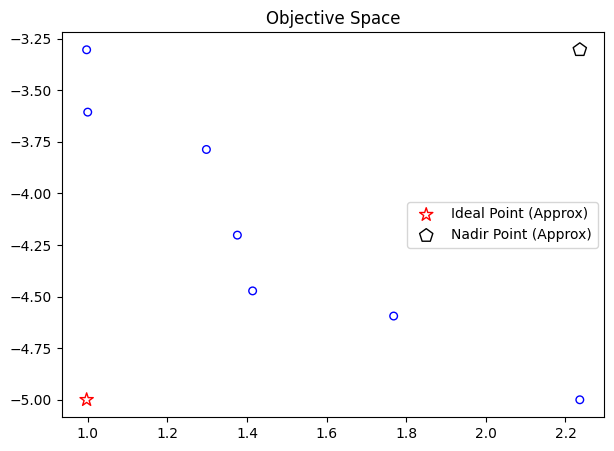

In [5]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.legend()
plt.show()

Best regarding ASF: Point 
i = 2
F = [ 1.76847753 -4.59406434]


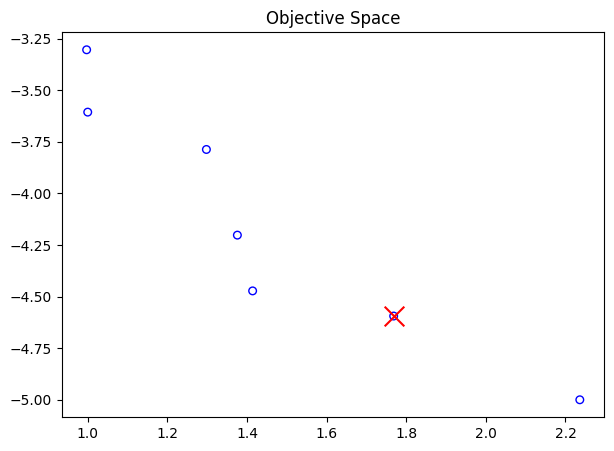

In [7]:
from pymoo.decomposition.asf import ASF

decomp = ASF()

weights = np.array([0.2, 0.8])

nF = (F - approx_ideal) / (approx_nadir - approx_ideal)
i = decomp.do(nF, 1/weights).argmin()

print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

In [8]:
soln=np.asarray(X[i], dtype = 'int')

print("The best solution found")

print("Optimal facility location: ", soln)

print("Optimal distance between the company facilities: ", round(F[i][0],2))

print("Optimal distance between the new facility and a competitor's facility: ", round(-F[i][1]))

The best solution found
Optimal facility location:  [0 0]
Optimal distance between the company facilities:  1.77
Optimal distance between the new facility and a competitor's facility:  5
